1. 

En el archivo "logistic_regression_df_class" hemos visto un ejemplo multiclase. Elimina del dataframe todas las filas que se correspondan con la clase valor "1".

Ahora, realiza el ejercicio con el nuevo dataframe:

- ¿Se mejora la precisión del algoritmo con dos clases? ¿por qué?

LogisticRegression() es una clase que tiene varios parámetros de entrada. Investiga (toca, modifica, prueba) las variables y comenta si hay alguna de ellas que, modificándola, mejore el porcentaje de acierto del problema.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html


### Importamos librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import seaborn as sns 

### Cargamos el dataframe

In [2]:
dataframe = pd.read_csv("/Users/Elsa/Desktop/The_Bridge/data_science_jun_2020/week8/day3/data/usuarios_win_mac_lin.csv")

In [3]:
dataframe.drop(dataframe[dataframe.clase == 1].index, axis=0, inplace=True)

In [4]:
dataframe

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2
...,...,...,...,...,...
165,13.0,1,7,42,0
166,12.0,1,2,6,0
167,13.0,1,3,9,0
168,13.0,1,7,28,0


In [6]:
X = dataframe[["paginas", "acciones", "valor", "clase"]]
y = dataframe["duracion"]

### Entrenamos el modelo
Como no me especifican el porcentaje de entrenamiento, aplico un 80-20 %

Dividimos el conjunto de entrenamiento y conjunto de test:

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

Aplicamos la funcion de linearRegression:

In [10]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression(n_jobs=-1) 

Entrenamos el modelo

In [11]:
lm.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

### Evaluación del modelo

In [12]:
print(lm.intercept_)

15.745047140547172


Calculamos su coeficiente:

In [13]:
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['duracion'])
coeff_df

,duracion
paginas,32.365261
acciones,2.333237
valor,-1.127830
clase,28.615309


### Predecimos el modelo

In [14]:
predictions = lm.predict(X_test)
predictions

array([240.82900416, 105.57365516,  24.9689086 ,  24.9689086 ,
        39.70827854,  17.07409677,  61.57100251,  71.60808044,
        30.68563645, 144.93862751,  40.80459854, 105.57365516,
        27.70649377,  61.57100251,  46.00980086,  81.56164105,
       101.64441214,  44.95954714,  42.8590397 , 274.39967212,
        78.37506201, 147.37823496, 252.88307221,  21.06124564,
        46.00980086,  42.8590397 ])

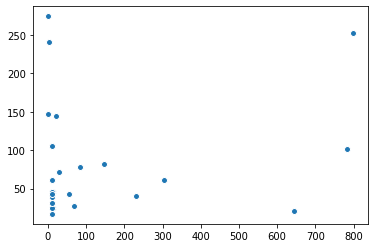

In [15]:
plt.scatter(y_test, predictions, edgecolor='white')

### Respondemos a las preguntas

¿Se mejora la precisión del algoritmo con dos clases? ¿por qué?

In [17]:
print("El conjunto de entrenamiento tiene un ", lm.score(X_train,y_train)*100, " %")
print("El conjunto de test tiene un ", lm.score(X_test,y_test)*100, " %")

El conjunto de entrenamiento tiene un  9.636429881236353  %
El conjunto de test tiene un  -1.2280673198902914  %


In [ ]:
Mejora para el conjunto de test pero no lo suficiente para que sea un buen modelo.

Esto sucede porque hay menos datos en el análisis.

## Modificamos valores:

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1010)

In [20]:
lm = LinearRegression(n_jobs=-1) 
lm.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [21]:
print(lm.intercept_)

8.43016086452235


In [22]:
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['duracion'])
coeff_df

,duracion
paginas,68.630919
acciones,-7.462346
valor,0.096768
clase,-14.445199


In [23]:
predictions = lm.predict(X_test)

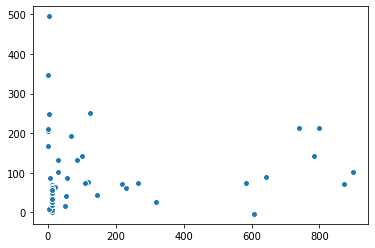

In [24]:
plt.scatter(y_test, predictions, edgecolor='white')

In [25]:
print("El conjunto de entrenamiento tiene un ", lm.score(X_train,y_train)*100, " %")
print("El conjunto de test tiene un ", lm.score(X_test,y_test)*100, " %")

El conjunto de entrenamiento tiene un  18.275176017129514  %
El conjunto de test tiene un  -7.585796559612312  %


Sigue sin ser un buen modelo.